In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
#List of lambda values
lambdas = ['1.00', '1.06', '1.08']

#Nr of replicas
replicas = 10

#Bound threshold (nm)
thresh = 0.8


# Fraction bound with mindist between all beads

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/lindorffgrp-isilon/thomasen/software/mi

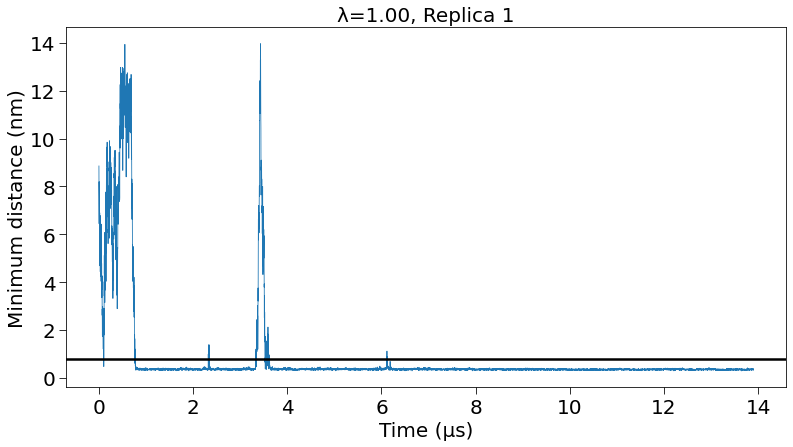

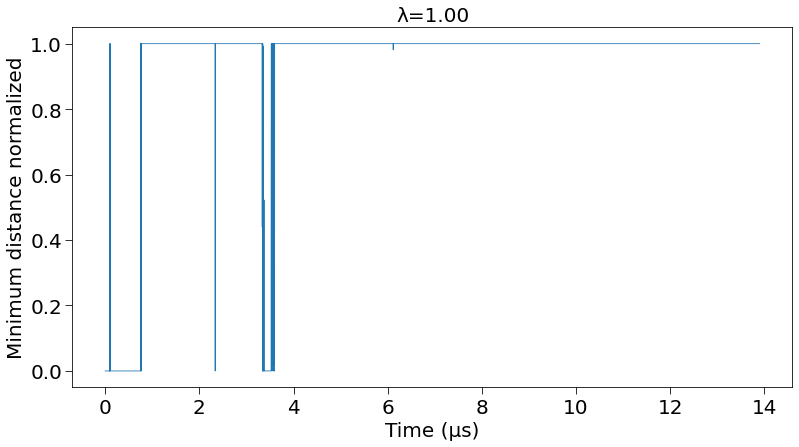

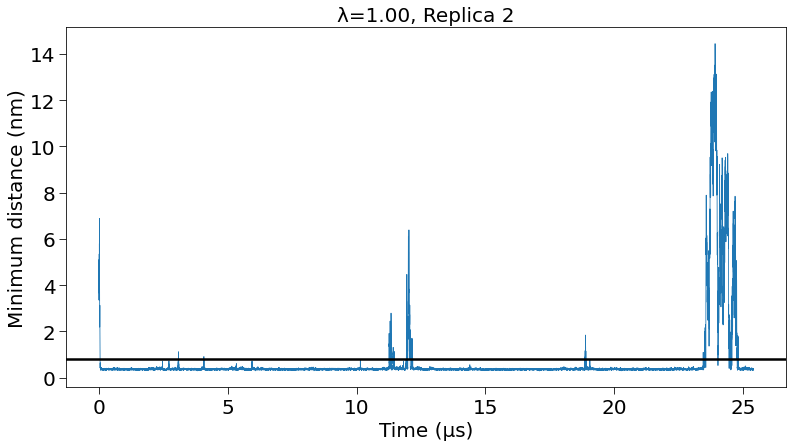

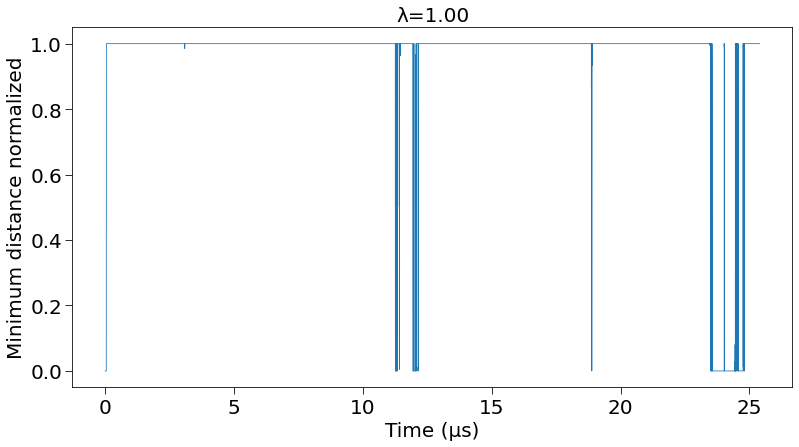

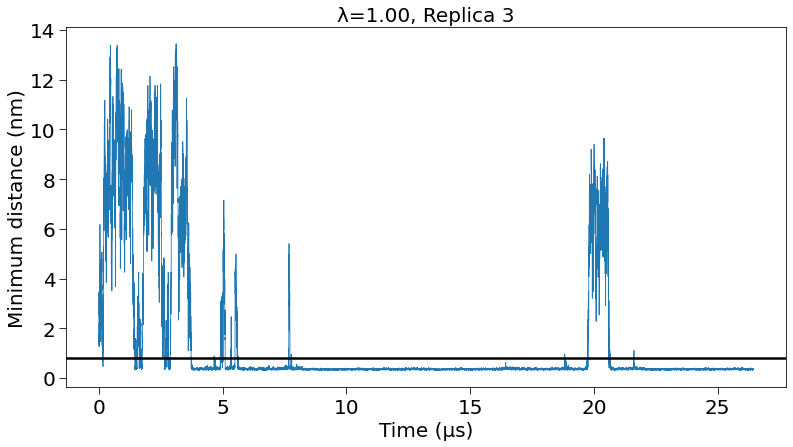

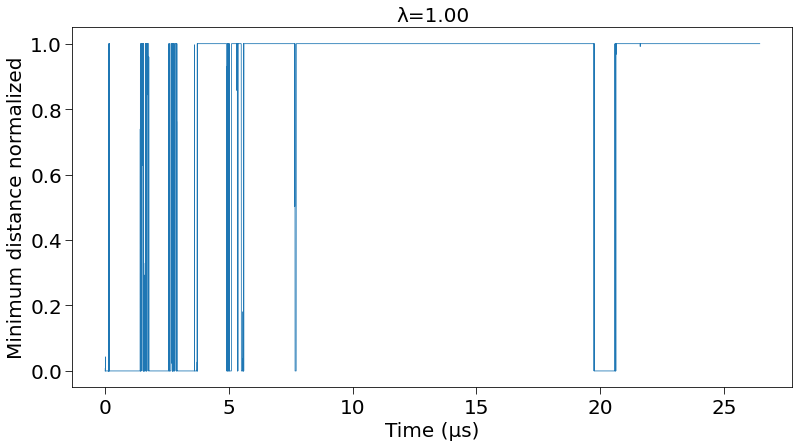

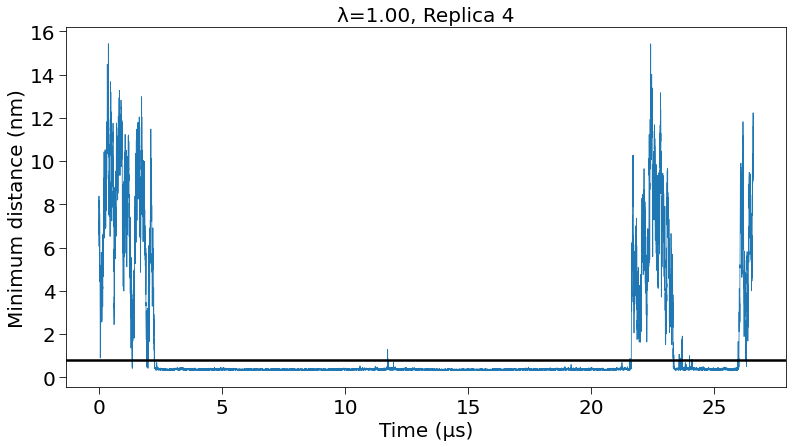

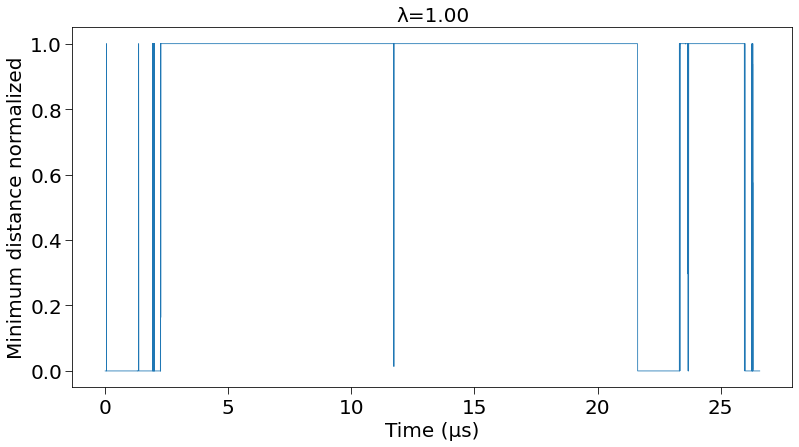

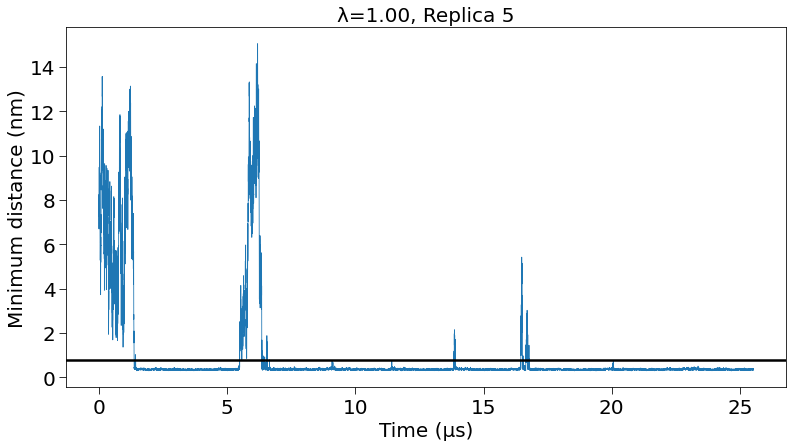

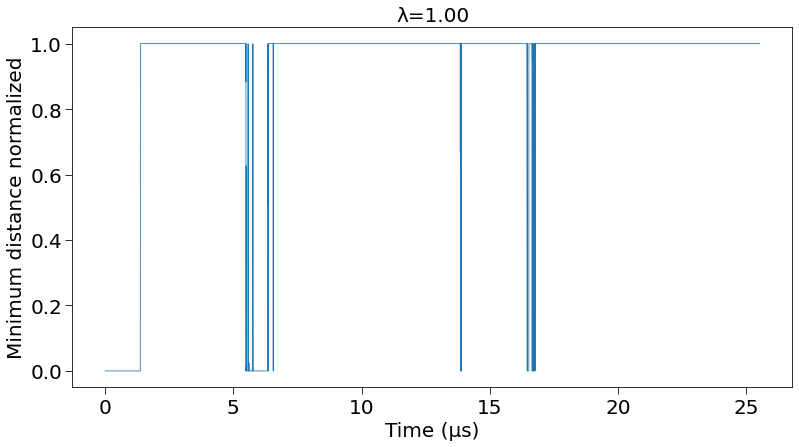

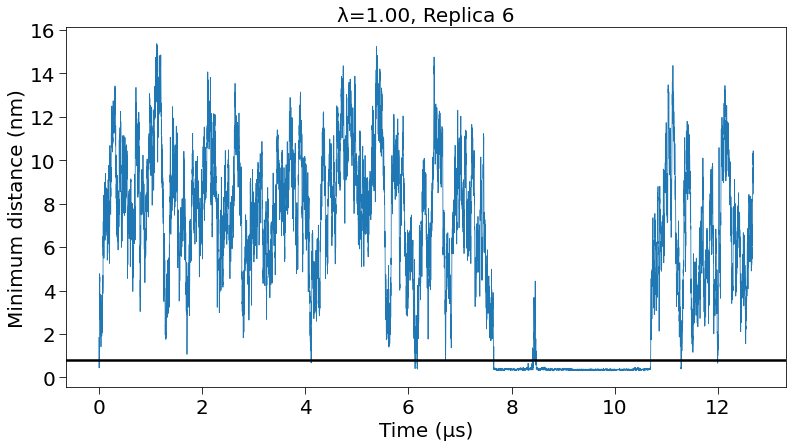

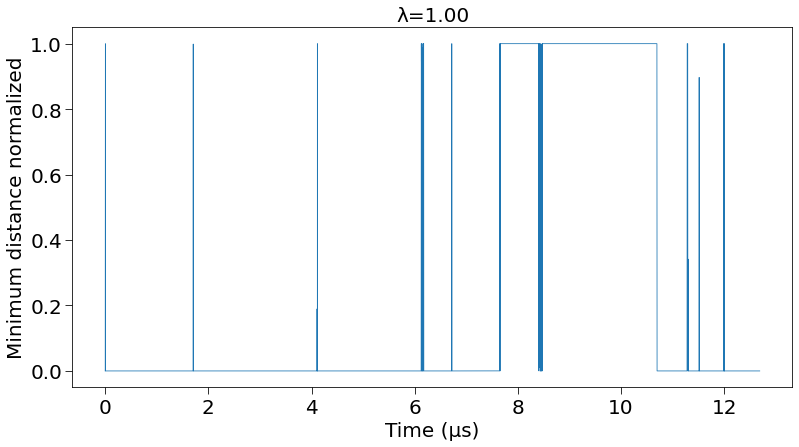

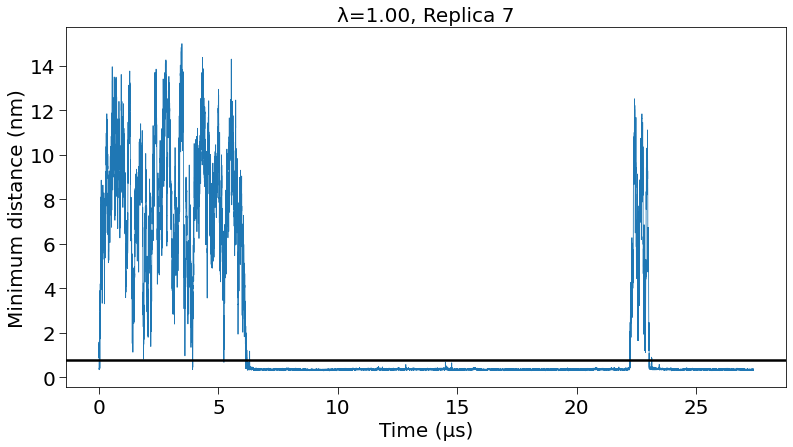

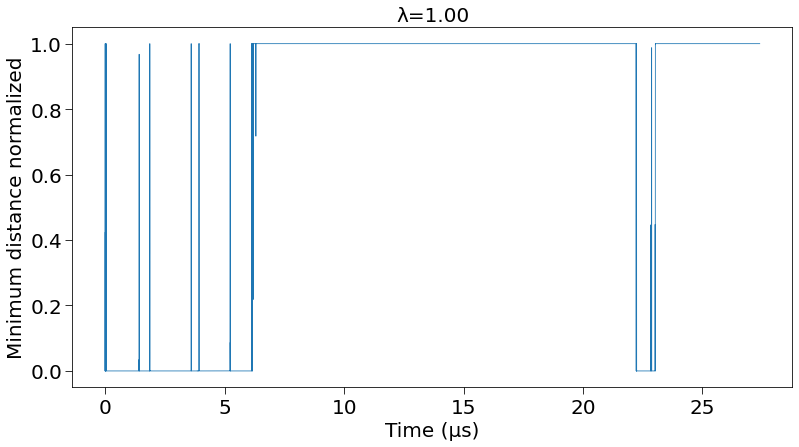

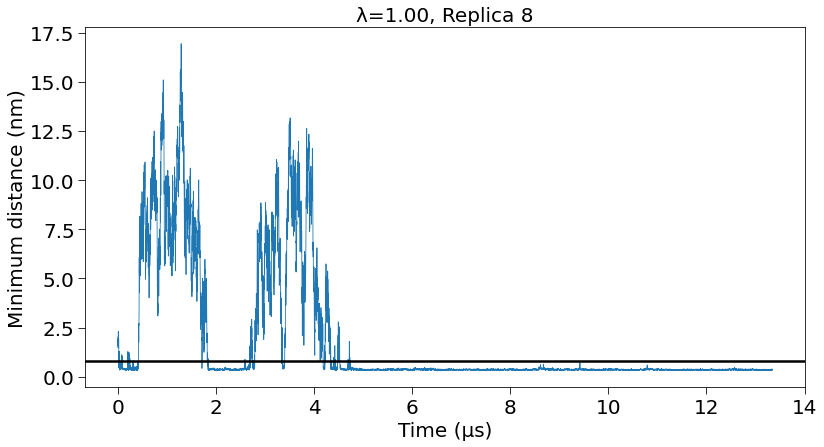

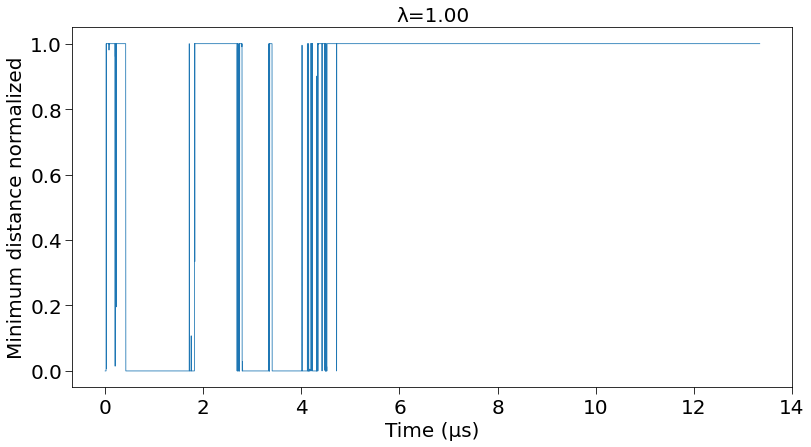

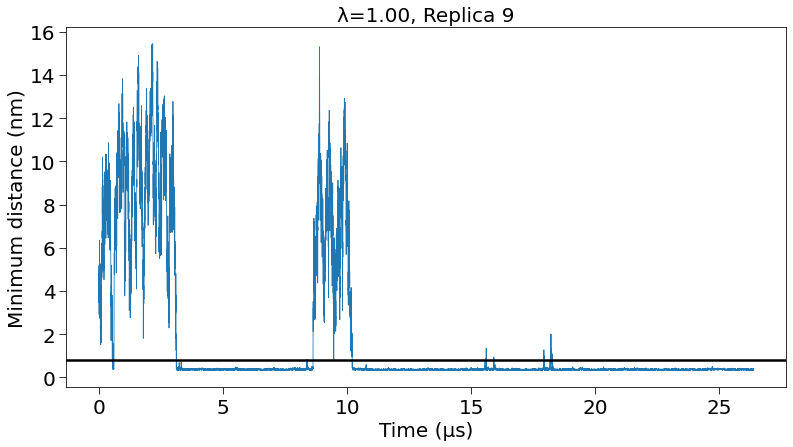

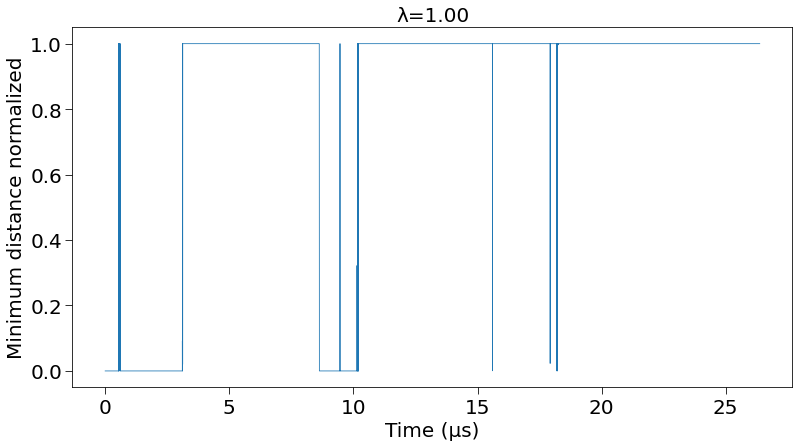

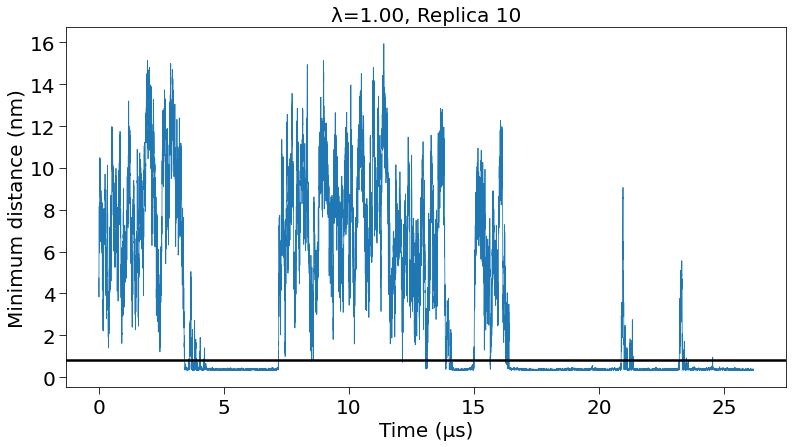

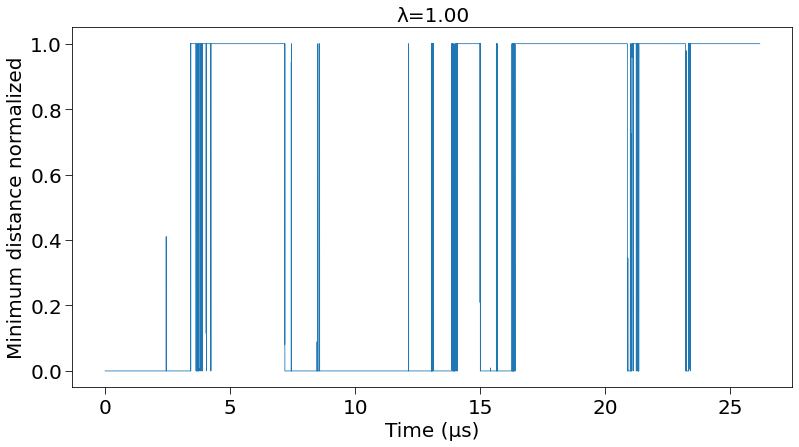

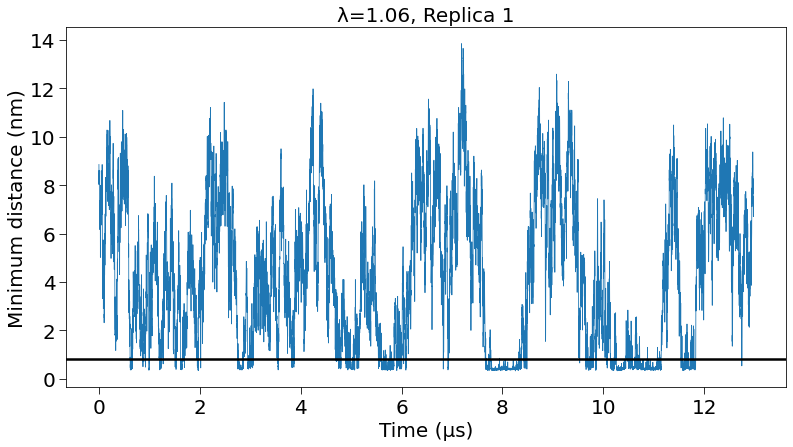

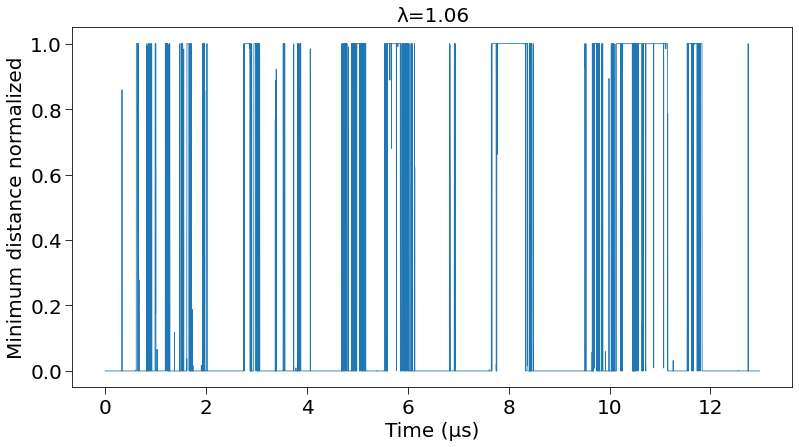

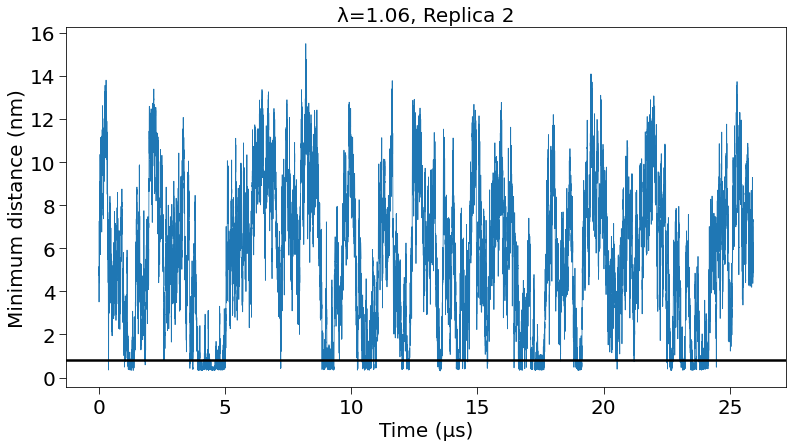

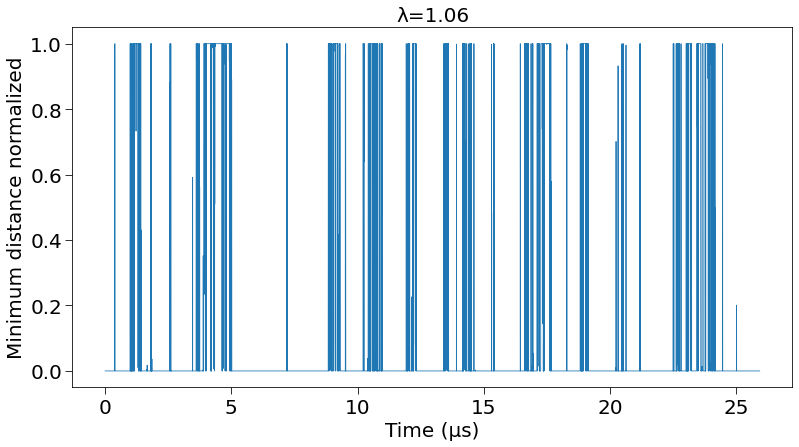

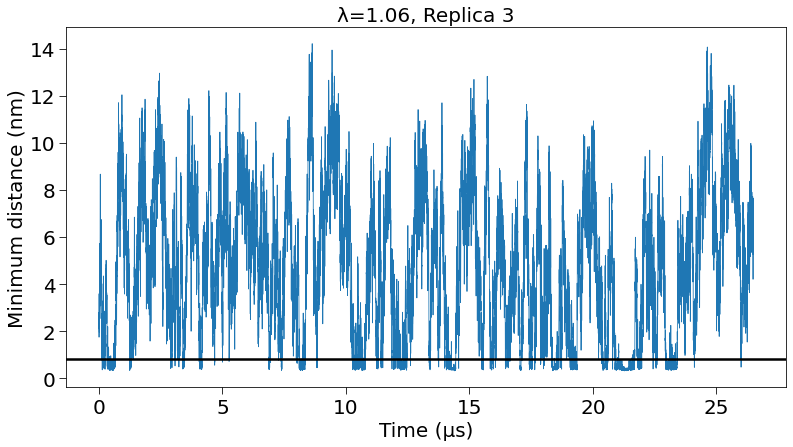

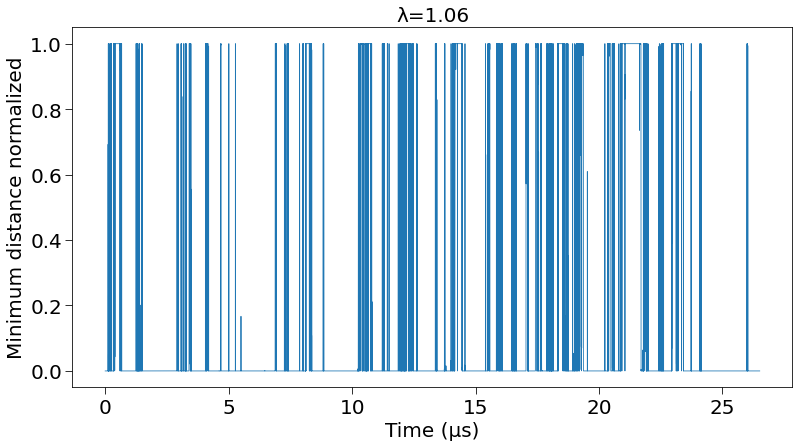

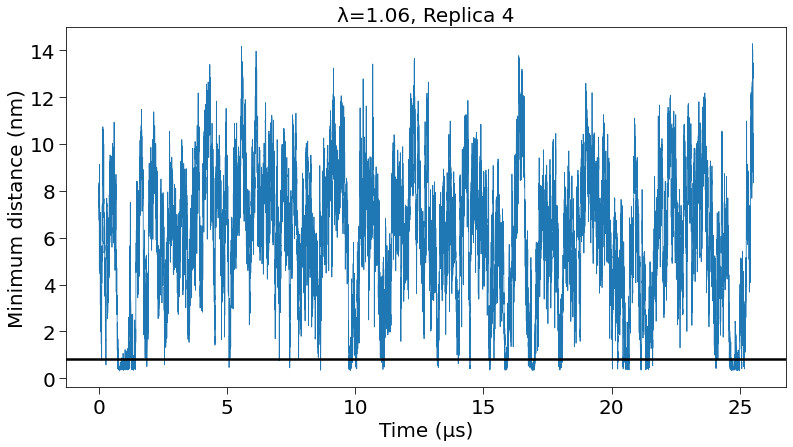

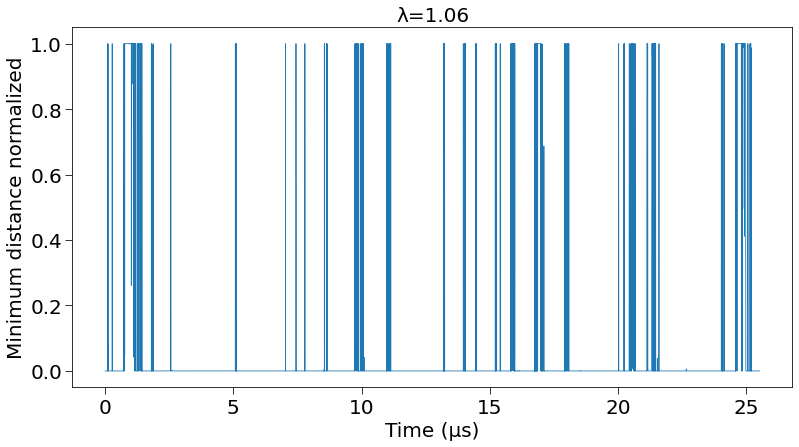

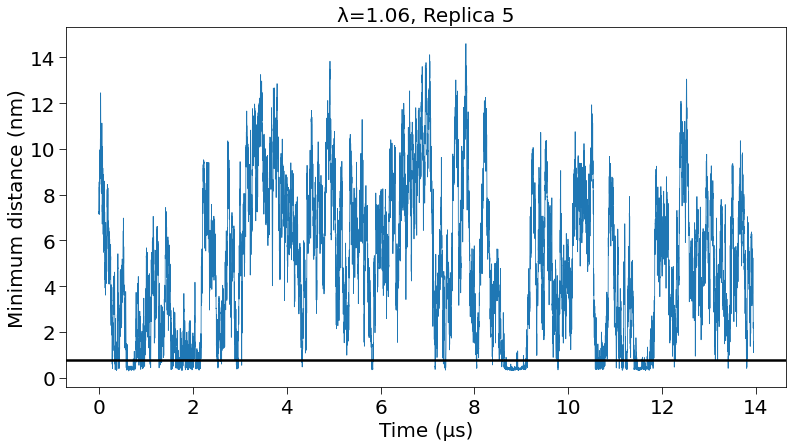

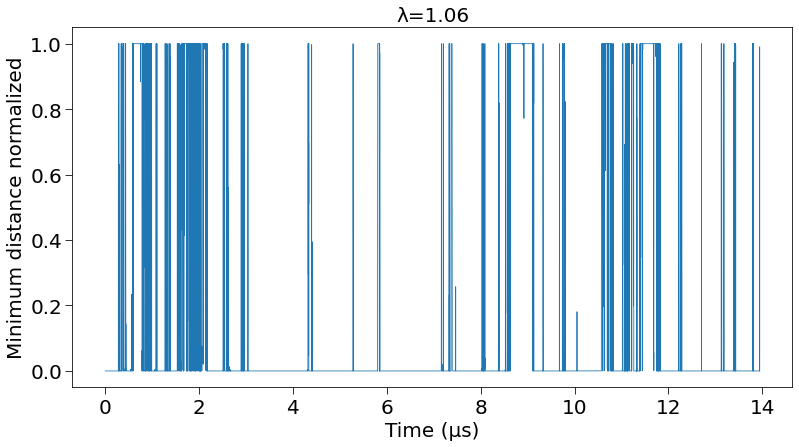

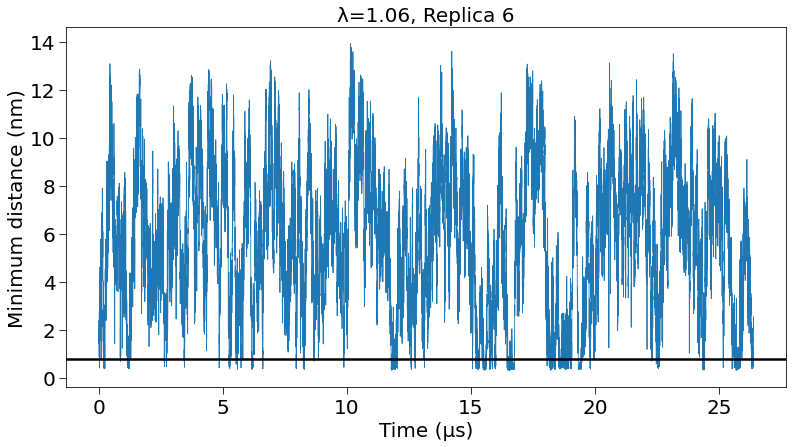

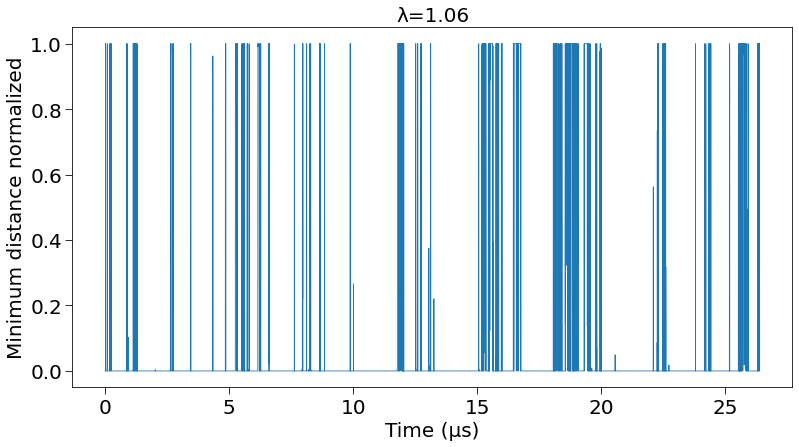

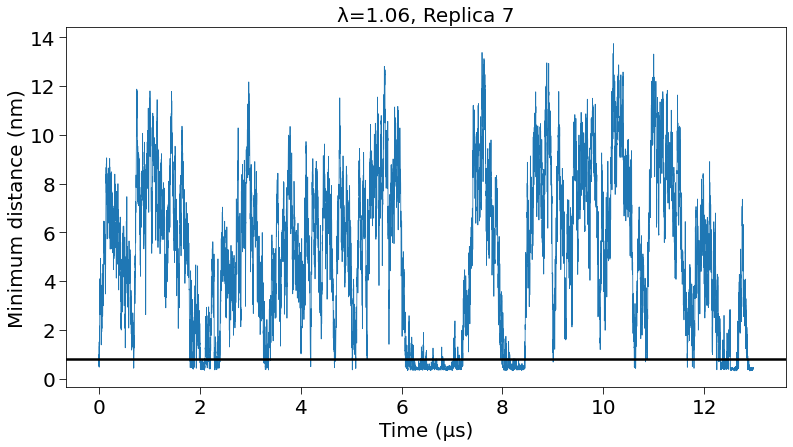

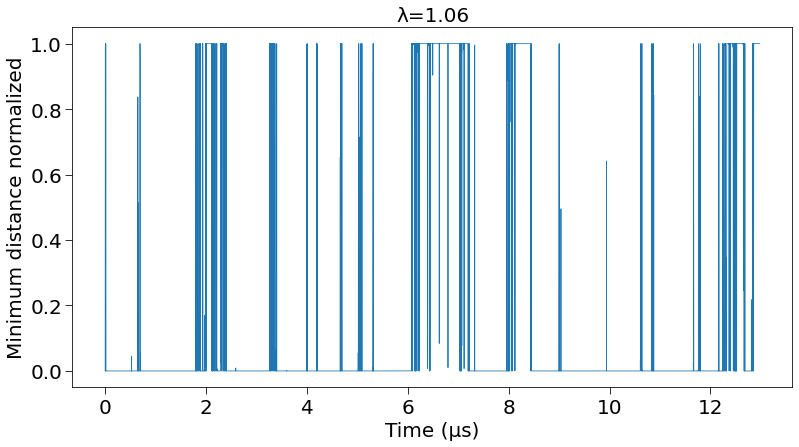

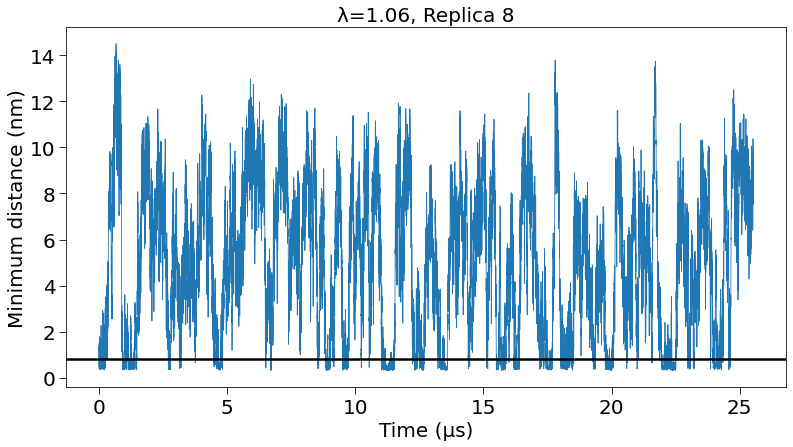

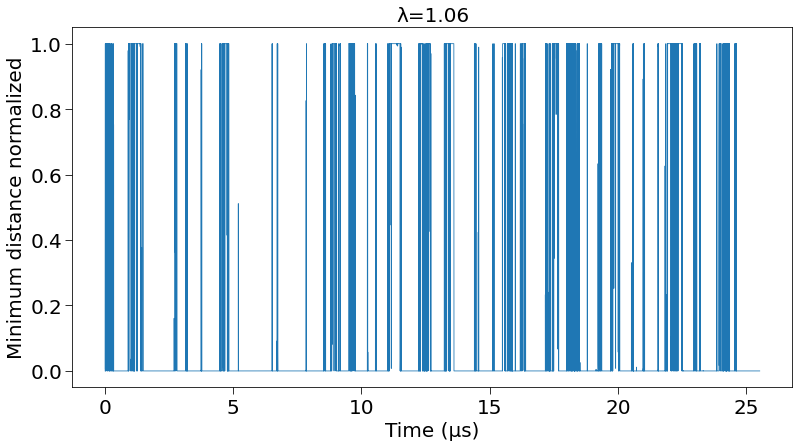

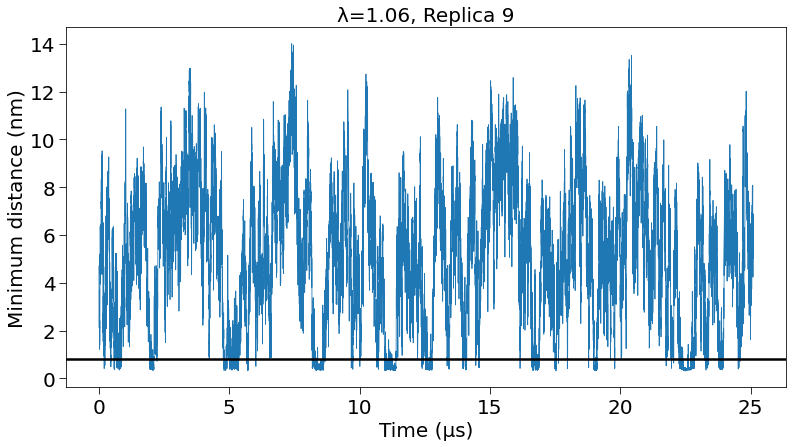

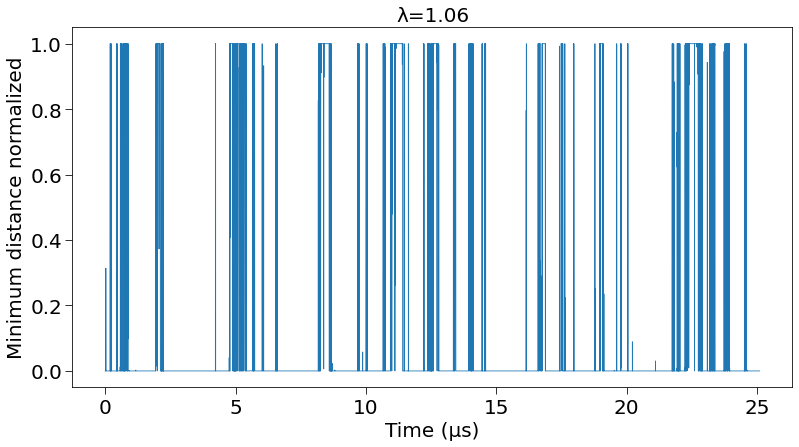

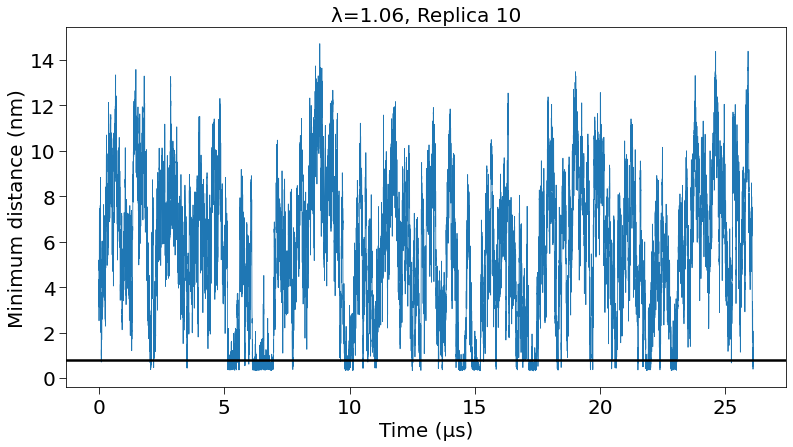

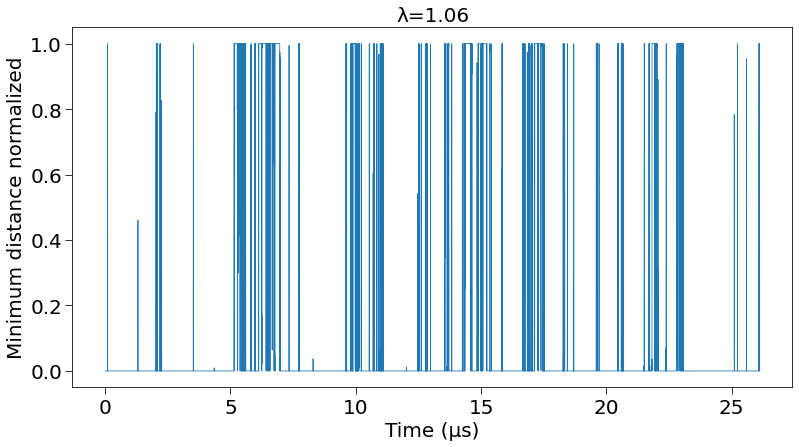

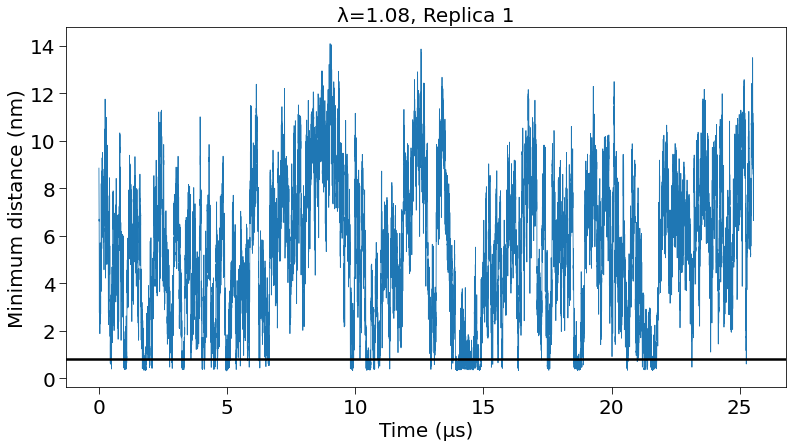

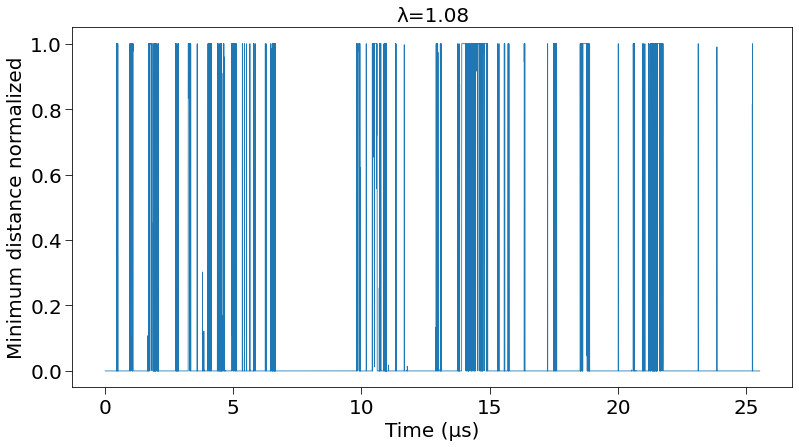

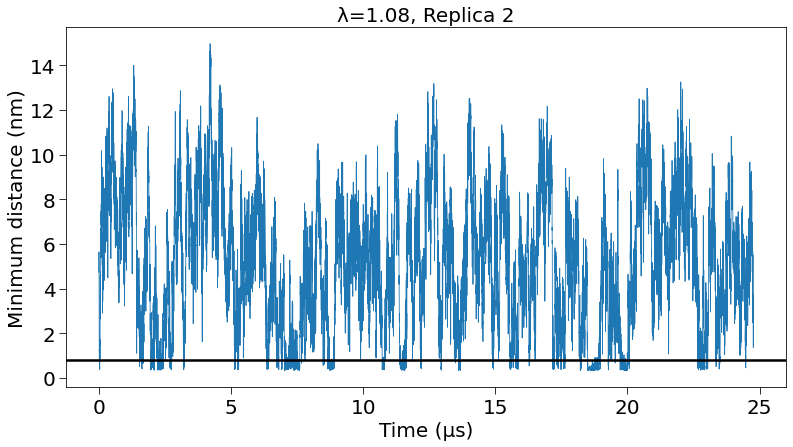

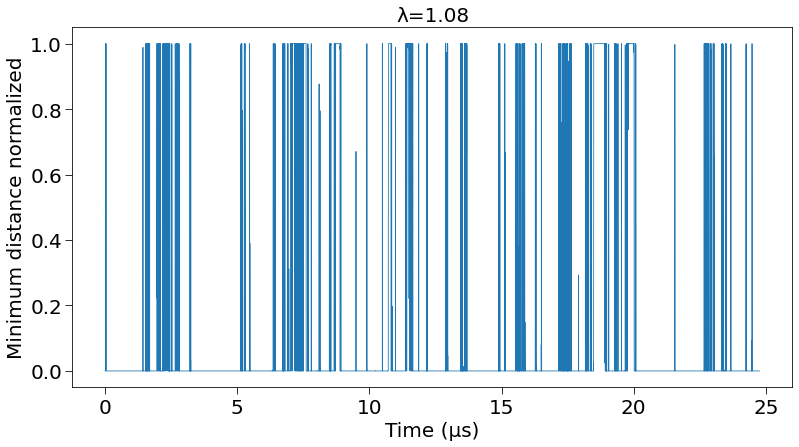

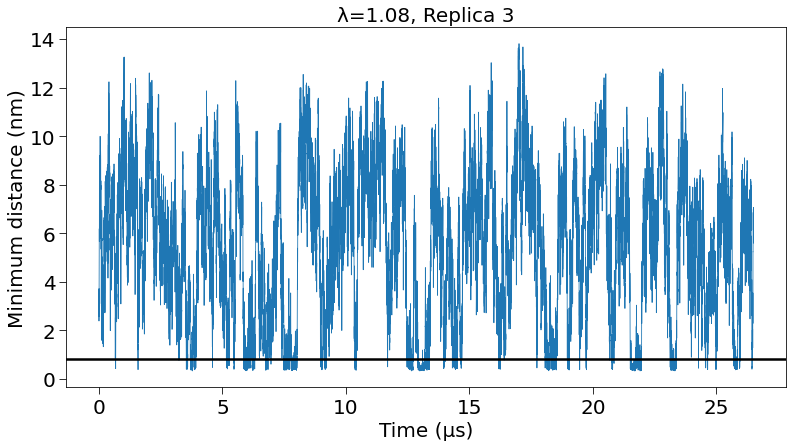

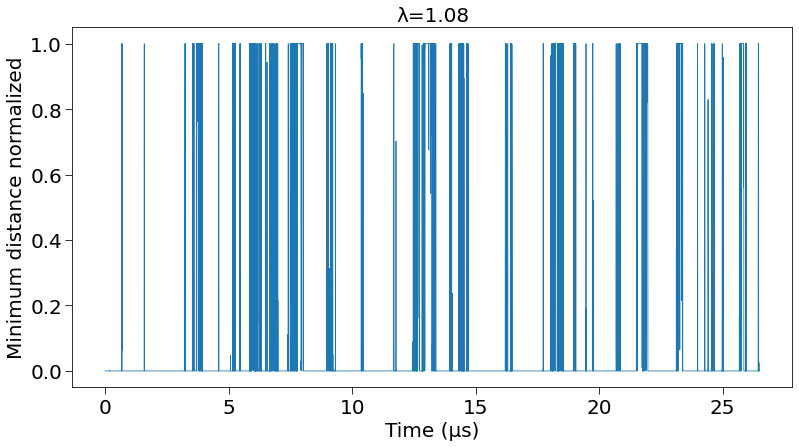

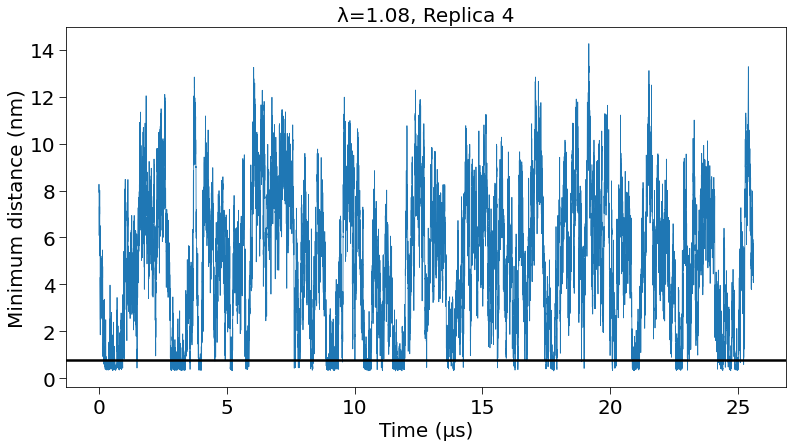

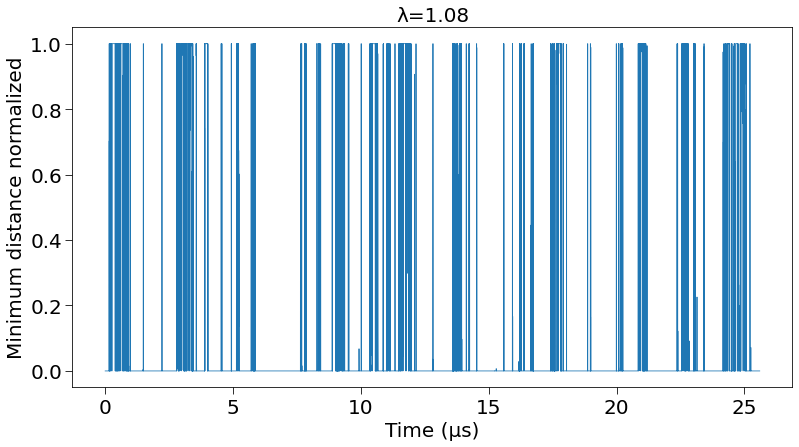

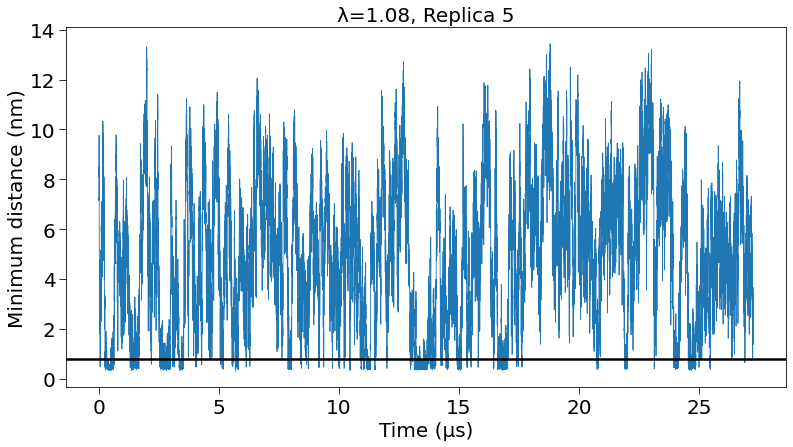

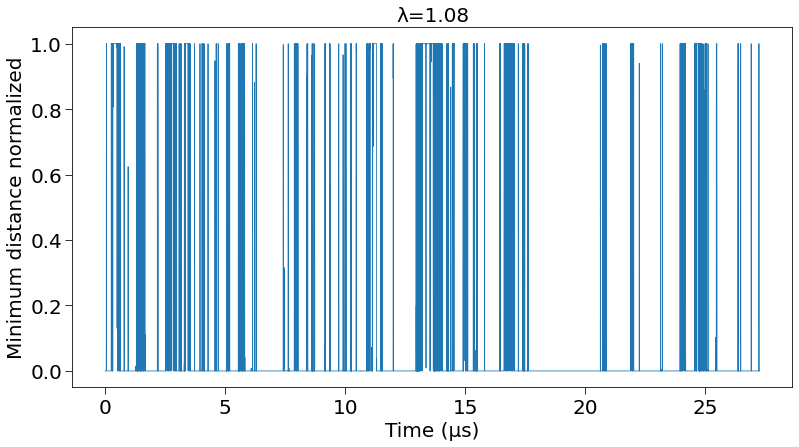

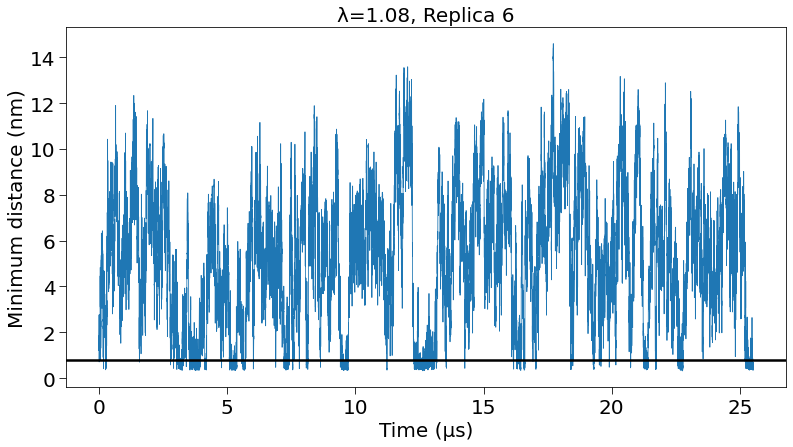

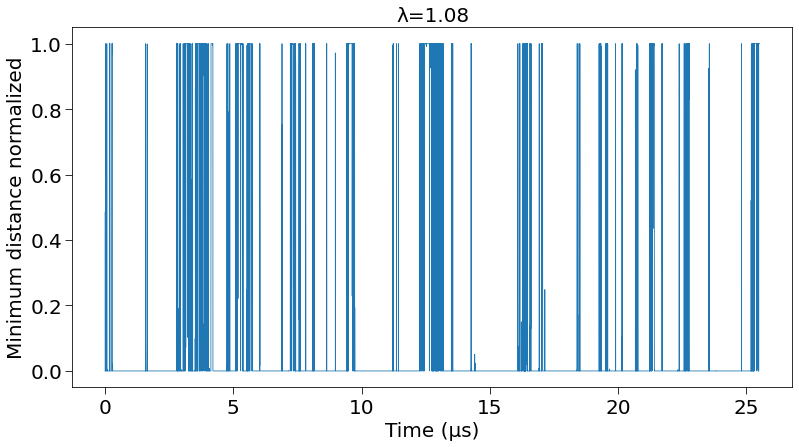

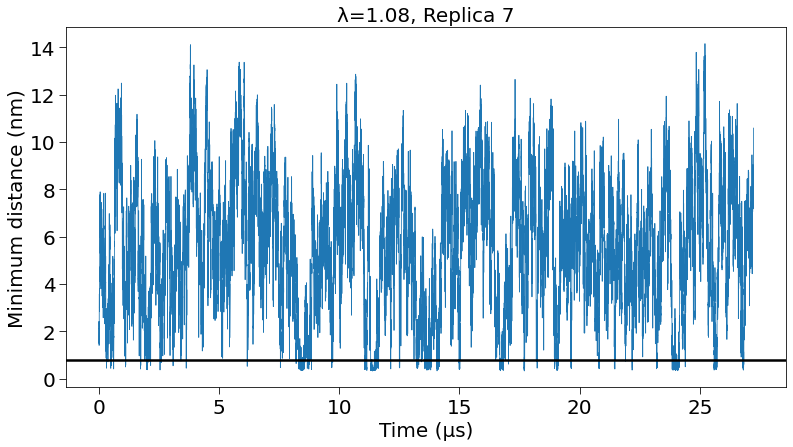

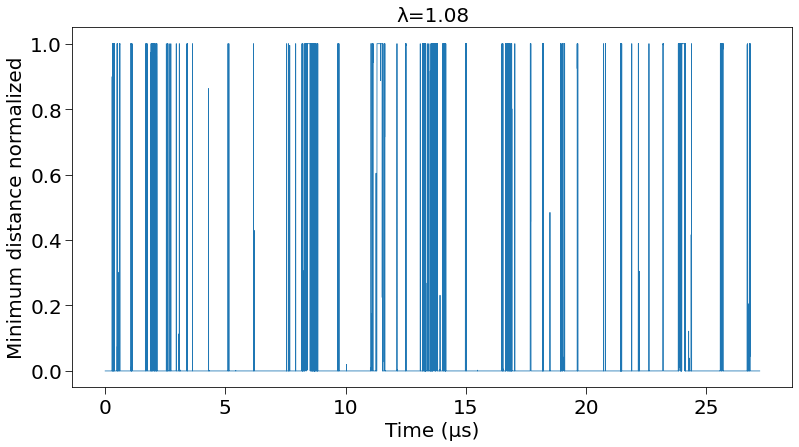

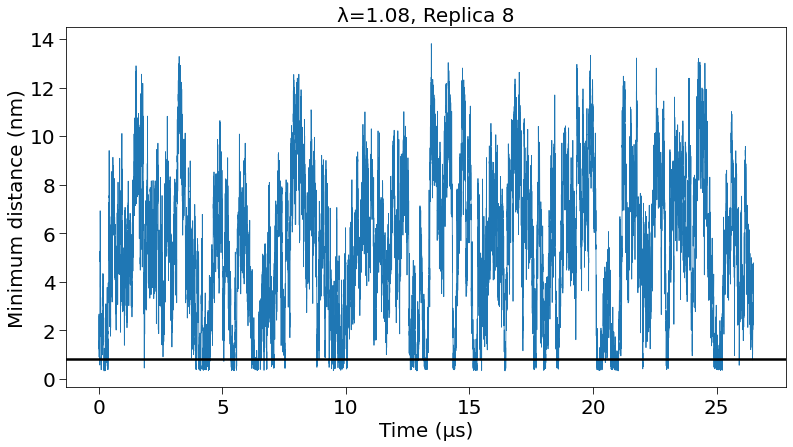

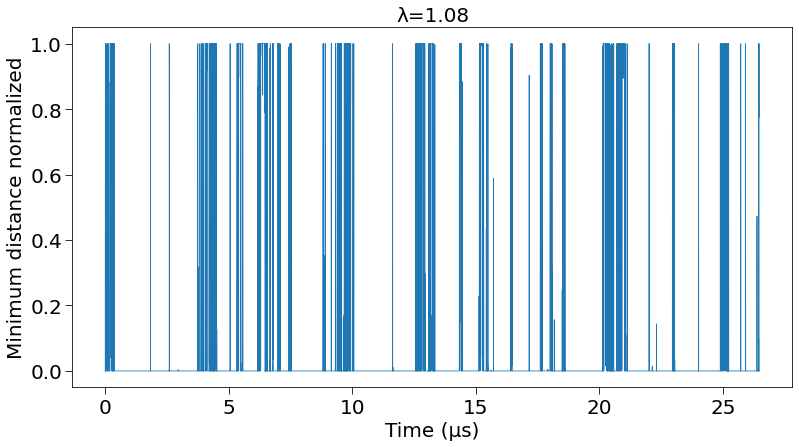

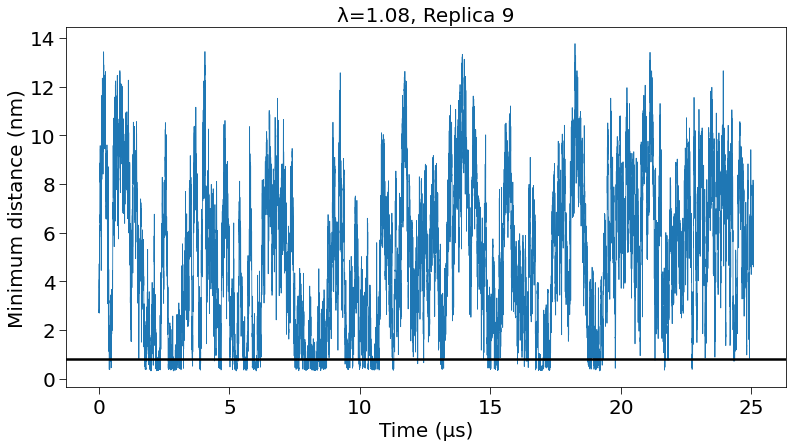

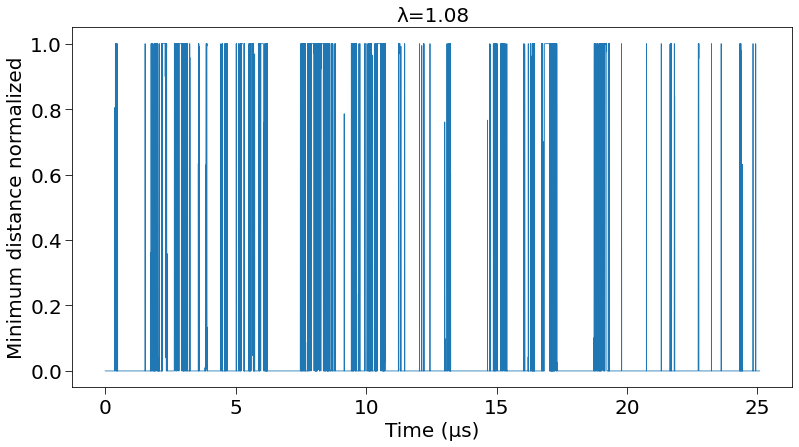

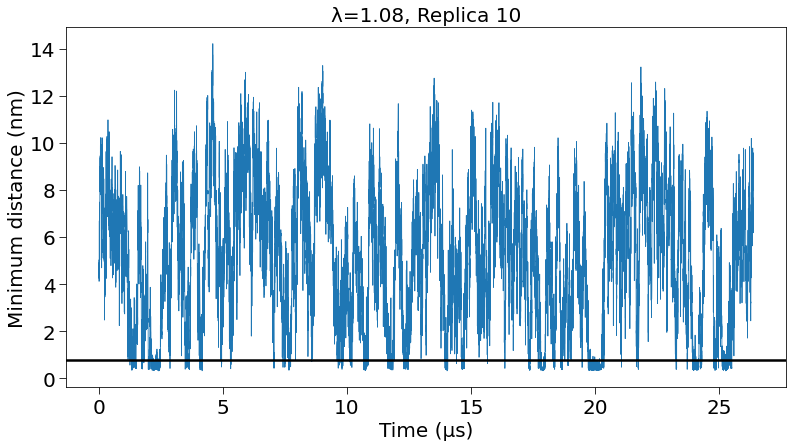

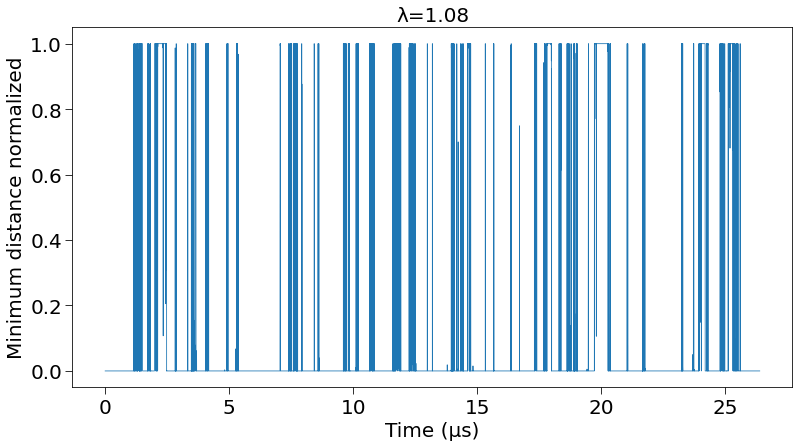

In [3]:
#Analyze fraction bound with single cut-off

fraction_bound_vs_lambda = []
fraction_bound_err_vs_lambda = []

#Loop over lambdas
for l in lambdas:
    
    fraction_bound_vs_replica = []
    
    #Loop over replicas
    for replica in range(replicas): 
    
        #Load data (minimum distance between all beads)
        time, mindist = np.genfromtxt('two_aSyn_%s/lambda_%s/data/aSyn1_aSyn2_mindist_lambda%s.xvg' % (str(replica+1),l,l), skip_header=24, usecols=(0,1), unpack=True)

        #Plot data initially
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist, '-', linewidth = 0.8)
        plt.axhline(thresh, linewidth=2.5, color='black', alpha=1)
        plt.title(f'λ={l}, Replica {replica+1}', fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance (nm)', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)

        #Fermi transform distance to check for two states
        L=1.5
        B=50
        mindist_fermi = 1/(1+np.exp(B*(mindist-L*thresh)))

        #Plot data fermi transformed
        fig= plt.figure(figsize=(10,5))
        axes= fig.add_axes([1,1,1,1])
        plt.plot(time, mindist_fermi, '-', linewidth = 0.8)
        plt.title('λ=' + str(l), fontsize=20)
        plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
        plt.ylabel('Minimum distance normalized', fontsize=20)
        plt.xlabel('Time (µs)', fontsize=20)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.png" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        fig.savefig("figures/mindist_vs_time_fermiswitch_lambda%s_replica%s.pdf" % (l,str(replica+1)), bbox_inches='tight', pad_inches=1, dpi=400)
        
        #Count number of bound
        frames_bound = np.count_nonzero(mindist < thresh)
        #Get fraction bound
        fraction_bound = frames_bound/len(mindist)
        #Append to list
        fraction_bound_vs_replica.append(fraction_bound)
        
    #Average over replicas
    fraction_bound_avg = np.average(fraction_bound_vs_replica)
    fraction_bound_vs_lambda.append(fraction_bound_avg)

    #Get SEM over replicas
    fraction_bound_err = np.std(fraction_bound_vs_replica)/np.sqrt(np.size(fraction_bound_vs_replica))
    fraction_bound_err_vs_lambda.append(fraction_bound_err)

[0.7535723486247499, 0.11750673888465302, 0.08389255007246985]
[0.06442715873866935, 0.012796450483020376, 0.004971599696726804]


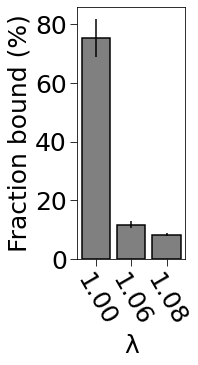

In [7]:
#Plot fraction bound bar plot
fig= plt.figure(figsize=(1.5,3.5))
axes= fig.add_axes([1,1,1,1])
plt.bar(lambdas, np.array(fraction_bound_vs_lambda)*100, yerr=np.array(fraction_bound_err_vs_lambda)*100, align='center', width = 0.8, color='gray', edgecolor='black', linewidth=1.5)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.ylabel('Fraction bound (%)', fontsize=25)
plt.xlabel('λ', fontsize=25)

#Save figure
fig.savefig("figures/fractionbound_vs_lambda_allbeads_singlecutoff.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/fractionbound_vs_lambda_allbeads_singlecutoff.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

#Print fraction bound and error
print(fraction_bound_vs_lambda)
print(fraction_bound_err_vs_lambda)